Loading data...
Total records: 141,597
Year range: 1924 - 2024
States: 41
Counties: 2886

✓ Visualization saved: corn_eda_comprehensive.png

KEY STATISTICS

Yield Statistics:
  Mean: 91.2 BU/ACRE
  Median: 87.8 BU/ACRE
  Std Dev: 48.7 BU/ACRE
  Min: 0.0 BU/ACRE
  Max: 296.3 BU/ACRE

Abandonment Rate Statistics:
  Mean: 20.47%
  Median: 10.62%
  Records with >10% abandonment: 72,421
  Records with >20% abandonment: 47,530

TOP 10 WORST STRESS YEARS (High Abandonment = Likely Drought)
   1. 1936: 45.71% abandonment,  14.7 BU/ACRE avg yield, 317 counties
   2. 1977: 30.58% abandonment,  69.3 BU/ACRE avg yield, 2530 counties
   3. 1934: 30.39% abandonment,  18.5 BU/ACRE avg yield, 394 counties
   4. 1980: 29.08% abandonment,  68.5 BU/ACRE avg yield, 2411 counties
   5. 1966: 28.16% abandonment,  53.9 BU/ACRE avg yield, 1492 counties
   6. 1974: 27.77% abandonment,  62.4 BU/ACRE avg yield, 2428 counties
   7. 1983: 27.16% abandonment,  70.9 BU/ACRE avg yield, 2345 counties
   8. 1964: 27.14

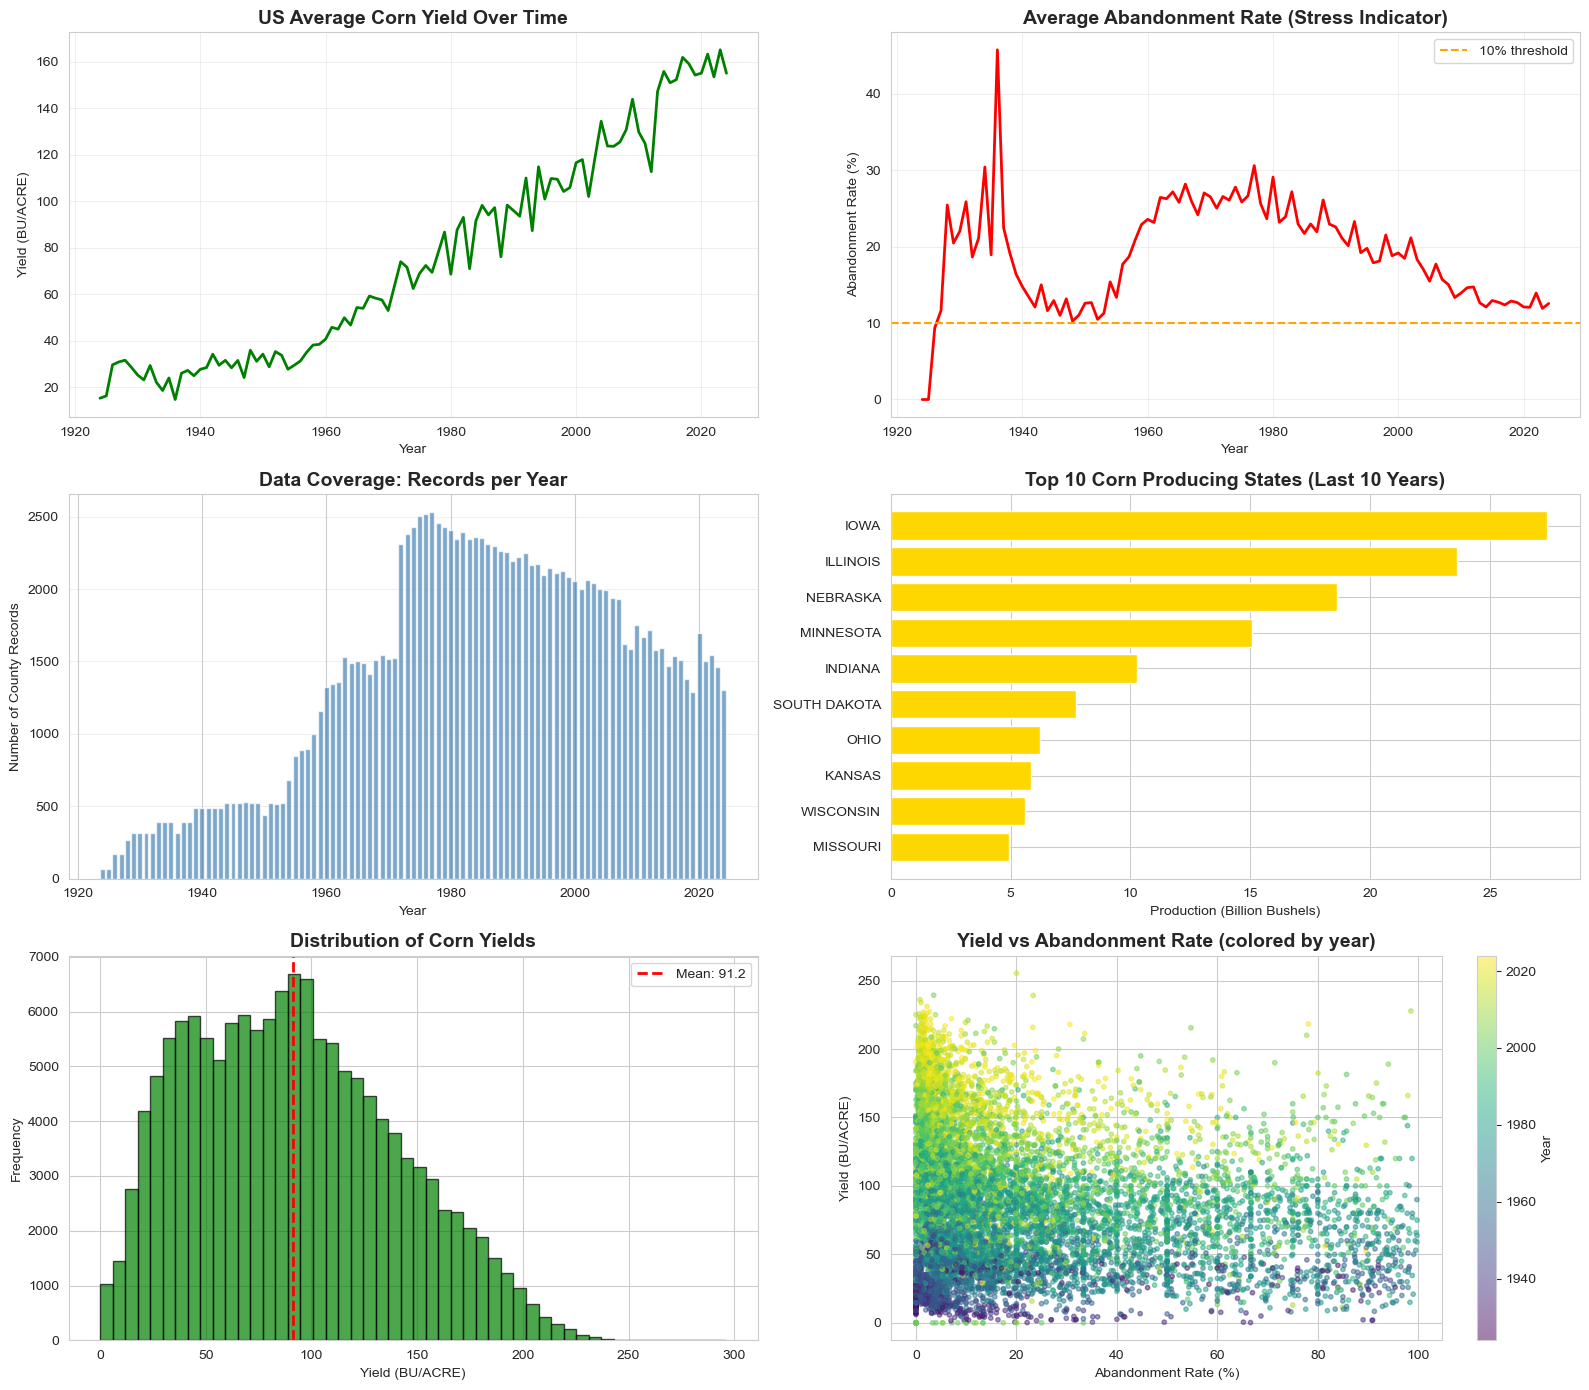

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (16, 12)

print("Loading data...")
df = pd.read_csv('modeling_dataset_complete.csv')

print(f"Total records: {len(df):,}")
print(f"Year range: {int(df['Year'].min())} - {int(df['Year'].max())}")
print(f"States: {df['State'].nunique()}")
print(f"Counties: {len(df.groupby(['State', 'County']))}")

# Create comprehensive visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 14))

# 1. Yield trends over time (national average)
yearly_yield = df.groupby('Year')['Yield_BU_ACRE'].mean()
axes[0, 0].plot(yearly_yield.index, yearly_yield.values, linewidth=2, color='green')
axes[0, 0].set_title('US Average Corn Yield Over Time', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Yield (BU/ACRE)')
axes[0, 0].grid(True, alpha=0.3)

# 2. Abandonment rate over time (stress indicator)
yearly_abandon = df.groupby('Year')['Abandonment_Rate'].mean() * 100
axes[0, 1].plot(yearly_abandon.index, yearly_abandon.values, linewidth=2, color='red')
axes[0, 1].axhline(y=10, color='orange', linestyle='--', label='10% threshold')
axes[0, 1].set_title('Average Abandonment Rate (Stress Indicator)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Abandonment Rate (%)')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Records per year (data coverage)
records_per_year = df.groupby('Year').size()
axes[1, 0].bar(records_per_year.index, records_per_year.values, color='steelblue', alpha=0.7)
axes[1, 0].set_title('Data Coverage: Records per Year', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Number of County Records')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# 4. Top producing states (recent 10 years)
recent = df[df['Year'] >= df['Year'].max() - 10]
state_prod = recent.groupby('State')['Production_BU'].sum().sort_values(ascending=False).head(10)
axes[1, 1].barh(range(len(state_prod)), state_prod.values / 1e9, color='gold')
axes[1, 1].set_yticks(range(len(state_prod)))
axes[1, 1].set_yticklabels(state_prod.index)
axes[1, 1].set_title('Top 10 Corn Producing States (Last 10 Years)', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Production (Billion Bushels)')
axes[1, 1].invert_yaxis()

# 5. Yield distribution histogram
axes[2, 0].hist(df['Yield_BU_ACRE'], bins=50, color='green', alpha=0.7, edgecolor='black')
axes[2, 0].axvline(df['Yield_BU_ACRE'].mean(), color='red', linestyle='--', 
                   linewidth=2, label=f'Mean: {df["Yield_BU_ACRE"].mean():.1f}')
axes[2, 0].set_title('Distribution of Corn Yields', fontsize=14, fontweight='bold')
axes[2, 0].set_xlabel('Yield (BU/ACRE)')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].legend()

# 6. Scatter: Abandonment vs Yield
sample = df.sample(n=min(10000, len(df)), random_state=42)
scatter = axes[2, 1].scatter(sample['Abandonment_Rate'] * 100, 
                             sample['Yield_BU_ACRE'], 
                             c=sample['Year'], 
                             cmap='viridis', 
                             alpha=0.5, 
                             s=10)
axes[2, 1].set_title('Yield vs Abandonment Rate (colored by year)', fontsize=14, fontweight='bold')
axes[2, 1].set_xlabel('Abandonment Rate (%)')
axes[2, 1].set_ylabel('Yield (BU/ACRE)')
plt.colorbar(scatter, ax=axes[2, 1], label='Year')

plt.tight_layout()
plt.savefig('corn_eda_comprehensive.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualization saved: corn_eda_comprehensive.png")

# Print key statistics
print("\n" + "="*70)
print("KEY STATISTICS")
print("="*70)

print(f"\nYield Statistics:")
print(f"  Mean: {df['Yield_BU_ACRE'].mean():.1f} BU/ACRE")
print(f"  Median: {df['Yield_BU_ACRE'].median():.1f} BU/ACRE")
print(f"  Std Dev: {df['Yield_BU_ACRE'].std():.1f} BU/ACRE")
print(f"  Min: {df['Yield_BU_ACRE'].min():.1f} BU/ACRE")
print(f"  Max: {df['Yield_BU_ACRE'].max():.1f} BU/ACRE")

print(f"\nAbandonment Rate Statistics:")
print(f"  Mean: {df['Abandonment_Rate'].mean()*100:.2f}%")
print(f"  Median: {df['Abandonment_Rate'].median()*100:.2f}%")
print(f"  Records with >10% abandonment: {(df['Abandonment_Rate'] > 0.10).sum():,}")
print(f"  Records with >20% abandonment: {(df['Abandonment_Rate'] > 0.20).sum():,}")

# Identify worst stress years
print("\n" + "="*70)
print("TOP 10 WORST STRESS YEARS (High Abandonment = Likely Drought)")
print("="*70)
stress_years = df.groupby('Year').agg({
    'Abandonment_Rate': 'mean',
    'Yield_BU_ACRE': 'mean',
    'County': 'count'
}).sort_values('Abandonment_Rate', ascending=False).head(10)

for idx, (year, row) in enumerate(stress_years.iterrows(), 1):
    print(f"  {idx:2d}. {int(year)}: {row['Abandonment_Rate']*100:5.2f}% abandonment, "
          f"{row['Yield_BU_ACRE']:5.1f} BU/ACRE avg yield, {int(row['County'])} counties")

# Data coverage analysis
print("\n" + "="*70)
print("DATA COVERAGE RECOMMENDATION")
print("="*70)

coverage = df.groupby('Year').size()
best_coverage_start = coverage[coverage > 1000].index.min()
print(f"\nRecommended modeling timeframe: {int(best_coverage_start)} - {int(df['Year'].max())}")
print(f"Reason: {int(coverage[coverage > 1000].sum())} records ({coverage[coverage > 1000].sum()/len(df)*100:.1f}% of data)")
print(f"        with >1000 counties per year for good geographic coverage")

# Top states for analysis
print("\n" + "="*70)
print("TOP 10 STATES BY DATA DENSITY (Best for Modeling)")
print("="*70)
state_records = df.groupby('State').size().sort_values(ascending=False).head(10)
for idx, (state, count) in enumerate(state_records.items(), 1):
    print(f"  {idx:2d}. {state:20s} {count:>6,} records")

print("\n" + "="*70)
print("✓ EDA COMPLETE!")
print("="*70)

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

print("Loading data...")
df = pd.read_csv('modeling_dataset_complete.csv')

# Filter to recent years with good coverage (e.g., 1980+)
df = df[df['Year'] >= 1980].copy()
print(f"Using {len(df):,} records from 1980+")

# Create temporal features
df = df.sort_values(['State', 'County', 'Year'])
df['Yield_Lag1'] = df.groupby(['State', 'County'])['Yield_BU_ACRE'].shift(1)
df['Yield_3yr_Avg'] = df.groupby(['State', 'County'])['Yield_BU_ACRE'].transform(
    lambda x: x.rolling(3, min_periods=1).mean().shift(1)
)

# Remove first years with no lag data
df = df.dropna(subset=['Yield_Lag1'])

# Encode categorical variables
le_state = LabelEncoder()
le_county = LabelEncoder()
df['State_Encoded'] = le_state.fit_transform(df['State'])
df['County_Encoded'] = le_county.fit_transform(df['State'] + '_' + df['County'])

# Features (NO WEATHER DATA - just historical)
features = [
    'Year',
    'State_Encoded',
    'Area_Planted_ACRES',
    'Abandonment_Rate',
    'Harvest_Efficiency',
    'Yield_Lag1',
    'Yield_3yr_Avg'
]

X = df[features]
y = df['Yield_BU_ACRE']

# Split: use last 3 years as test set (time series split)
test_year = df['Year'].max() - 2
train = df[df['Year'] < test_year]
test = df[df['Year'] >= test_year]

X_train = train[features]
y_train = train['Yield_BU_ACRE']
X_test = test[features]
y_test = test['Yield_BU_ACRE']

print(f"\nTrain set: {len(X_train):,} records (years {int(train['Year'].min())}-{int(train['Year'].max())})")
print(f"Test set: {len(X_test):,} records (years {int(test['Year'].min())}-{int(test['Year'].max())})")

# Train baseline model
print("\nTraining Random Forest baseline model...")
model = RandomForestRegressor(n_estimators=100, max_depth=15, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("\n" + "="*70)
print("BASELINE MODEL RESULTS (NO WEATHER DATA)")
print("="*70)
print(f"MAE:  {mae:.2f} BU/ACRE")
print(f"RMSE: {rmse:.2f} BU/ACRE")
print(f"R²:   {r2:.3f}")
print(f"\nMean yield in test set: {y_test.mean():.1f} BU/ACRE")
print(f"Error as % of mean: {(mae/y_test.mean()*100):.1f}%")

# Feature importance
print("\n" + "="*70)
print("FEATURE IMPORTANCE")
print("="*70)
importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

for idx, row in importance.iterrows():
    print(f"  {row['Feature']:25s} {row['Importance']:.3f}")

print("\n" + "="*70)
print("NEXT STEP: Add weather data to improve predictions!")
print("Expected improvement with weather: +10-20% R² (0.05-0.15 boost)")
print("="*70)

Loading data...
Using 87,152 records from 1980+

Train set: 80,114 records (years 1981-2021)
Test set: 4,306 records (years 2022-2024)

Training Random Forest baseline model...

BASELINE MODEL RESULTS (NO WEATHER DATA)
MAE:  19.33 BU/ACRE
RMSE: 26.55 BU/ACRE
R²:   0.599

Mean yield in test set: 157.8 BU/ACRE
Error as % of mean: 12.2%

FEATURE IMPORTANCE
  Yield_3yr_Avg             0.746
  Year                      0.087
  State_Encoded             0.043
  Yield_Lag1                0.041
  Area_Planted_ACRES        0.037
  Harvest_Efficiency        0.025
  Abandonment_Rate          0.021

NEXT STEP: Add weather data to improve predictions!
Expected improvement with weather: +10-20% R² (0.05-0.15 boost)


In [ ]:
# =============================================================================
# ERROR ANALYSIS BY STATE
# =============================================================================

# Calculate error metrics by state
state_analysis = test_df_analysis.groupby('State').agg({
    'Abs_Error': ['mean', 'median', 'std', 'count'],
    'Error': 'mean',
    'Yield_BU_ACRE': 'mean',
    'Prediction': 'mean'
}).round(2)

state_analysis.columns = ['MAE', 'Median_AE', 'Std_AE', 'Count', 
                          'Mean_Error', 'Actual_Yield', 'Pred_Yield']

# Sort by MAE to find problem states
state_analysis_sorted = state_analysis.sort_values('MAE', ascending=False)

print("\n" + "="*80)
print("ERROR ANALYSIS BY STATE")
print("="*80)
print("\nTop 15 States with Highest Errors:")
print(state_analysis_sorted.head(15).to_string())

print("\n\nTop 15 States with Lowest Errors:")
print(state_analysis.sort_values('MAE', ascending=True).head(15).to_string())

# Visualize
fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Top 20 states by MAE (worst performers)
top_20_worst = state_analysis_sorted.head(20)
axes[0, 0].barh(range(len(top_20_worst)), top_20_worst['MAE'], 
                color='coral', alpha=0.7, edgecolor='black')
axes[0, 0].set_yticks(range(len(top_20_worst)))
axes[0, 0].set_yticklabels(top_20_worst.index)
axes[0, 0].axvline(mae, color='red', linestyle='--', linewidth=2, 
                    label=f'Overall MAE: {mae:.2f}')
axes[0, 0].set_xlabel('Mean Absolute Error (BU/ACRE)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Top 20 States with Highest Prediction Error', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3, axis='x')
axes[0, 0].invert_yaxis()

# 2. Top 20 states by MAE (best performers)
top_20_best = state_analysis.sort_values('MAE', ascending=True).head(20)
axes[0, 1].barh(range(len(top_20_best)), top_20_best['MAE'], 
                color='lightgreen', alpha=0.7, edgecolor='black')
axes[0, 1].set_yticks(range(len(top_20_best)))
axes[0, 1].set_yticklabels(top_20_best.index)
axes[0, 1].axvline(mae, color='red', linestyle='--', linewidth=2, 
                    label=f'Overall MAE: {mae:.2f}')
axes[0, 1].set_xlabel('Mean Absolute Error (BU/ACRE)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Top 20 States with Lowest Prediction Error', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='x')
axes[0, 1].invert_yaxis()

# 3. Error vs Sample Size
axes[1, 0].scatter(state_analysis['Count'], state_analysis['MAE'], 
                   s=100, alpha=0.6, c=state_analysis['Actual_Yield'],
                   cmap='viridis', edgecolor='black')
axes[1, 0].axhline(mae, color='red', linestyle='--', linewidth=2, 
                    label=f'Overall MAE: {mae:.2f}')
axes[1, 0].set_xlabel('Number of Test Records', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Mean Absolute Error (BU/ACRE)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Error vs Sample Size (colored by avg yield)', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(axes[1, 0].collections[0], ax=axes[1, 0])
cbar.set_label('Avg Yield (BU/ACRE)', fontsize=10)

# Annotate states with low sample size and high error
for state, row in state_analysis.iterrows():
    if row['Count'] < 50 and row['MAE'] > mae + 5:
        axes[1, 0].annotate(state, (row['Count'], row['MAE']), 
                           fontsize=8, alpha=0.7)

# 4. Bias by state (Top 20 by absolute bias)
state_analysis['Abs_Bias'] = abs(state_analysis['Mean_Error'])
top_20_bias = state_analysis.nlargest(20, 'Abs_Bias')
colors = ['red' if x < 0 else 'green' for x in top_20_bias['Mean_Error']]
axes[1, 1].barh(range(len(top_20_bias)), top_20_bias['Mean_Error'], 
                color=colors, alpha=0.6, edgecolor='black')
axes[1, 1].set_yticks(range(len(top_20_bias)))
axes[1, 1].set_yticklabels(top_20_bias.index)
axes[1, 1].axvline(0, color='black', linestyle='-', linewidth=1)
axes[1, 1].set_xlabel('Mean Error (BU/ACRE)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Top 20 States by Prediction Bias (Red=Over, Green=Under)', 
                     fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='x')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.savefig('results/error_by_state.png', dpi=300, bbox_inches='tight')
print("\n\n✓ Saved: results/error_by_state.png")
plt.show()

# State insights
print("\n" + "="*80)
print("STATE-SPECIFIC INSIGHTS")
print("="*80)

# Core corn belt states
corn_belt = ['IOWA', 'ILLINOIS', 'NEBRASKA', 'MINNESOTA', 'INDIANA', 'OHIO', 'SOUTH DAKOTA', 'KANSAS']
cb_states = [s for s in corn_belt if s in state_analysis.index]

if cb_states:
    print(f"\nCorn Belt States Performance:")
    cb_analysis = state_analysis.loc[cb_states].sort_values('MAE')
    for state, row in cb_analysis.iterrows():
        print(f"  {state:15s} MAE={row['MAE']:6.2f}, Records={int(row['Count']):4d}, "
              f"Avg Yield={row['Actual_Yield']:6.1f}")
    cb_mae = cb_analysis['MAE'].mean()
    print(f"\n  Corn Belt Avg MAE: {cb_mae:.2f} BU/ACRE")
    print(f"  vs Overall MAE:    {mae:.2f} BU/ACRE")
    if cb_mae < mae:
        print(f"  ✓ Model performs BETTER on Corn Belt ({(mae-cb_mae)/mae*100:.1f}% improvement)")
    else:
        print(f"  ✗ Model performs WORSE on Corn Belt ({(cb_mae-mae)/mae*100:.1f}% degradation)")

# Fringe states (low sample size)
fringe_states = state_analysis[state_analysis['Count'] < 100]
if len(fringe_states) > 0:
    print(f"\n\nFringe States (<100 test records):")
    for state, row in fringe_states.sort_values('MAE', ascending=False).iterrows():
        print(f"  {state:15s} MAE={row['MAE']:6.2f}, Records={int(row['Count']):4d}")
    fringe_mae = fringe_states['MAE'].mean()
    print(f"\n  Fringe States Avg MAE: {fringe_mae:.2f} BU/ACRE")
    print(f"  vs Overall MAE:        {mae:.2f} BU/ACRE")
    if fringe_mae > mae:
        print(f"  → Model struggles MORE on fringe states ({(fringe_mae-mae)/mae*100:.1f}% worse)")

print("="*80)
